<a href="https://colab.research.google.com/github/fatemeNik/st/blob/main/SpecialTopic_HM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [ ]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

In [ ]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

In [4]:

import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])



Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75172, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (698226, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198675, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0      965
1.5     2449
2.0     4826
2.5     7094
3.0     9304
3.5    13330
4.0    15578
4.5    13558
5.0     8068
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26238
Food                13872
Shopping            12114
Home Services        7187
Beauty & Spas        7143
Nightlife            6086
Health & Medical     5912
Local Services     

Distribution of labels:
label
positive    537369
negative    160857
Name: count, dtype: int64
positive: 100 top words
negative: 100 top words

=== Evaluation Metrics ===
Accuracy: 0.7414
Precision: 0.7755
Recall: 0.7414
F1-score: 0.7536

=== Classification Report ===
              precision    recall  f1-score   support

    positive       0.45      0.62      0.52    160857
    negative       0.87      0.78      0.82    537369

    accuracy                           0.74    698226
   macro avg       0.66      0.70      0.67    698226
weighted avg       0.78      0.74      0.75    698226



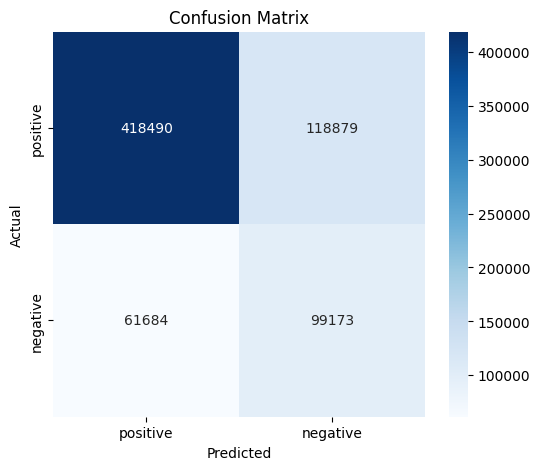

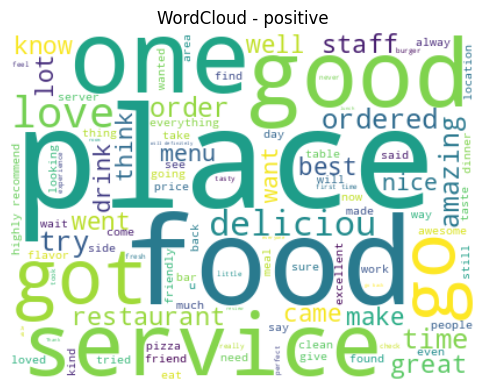

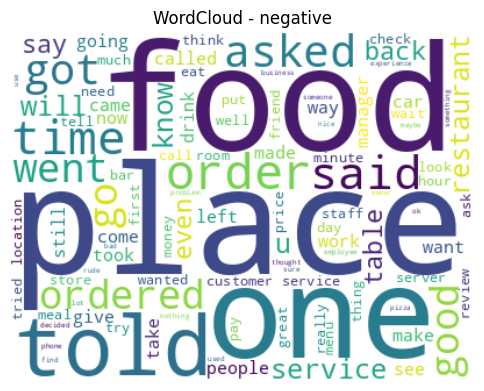

In [5]:
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from wordcloud import WordCloud

# --- 1. تعریف برچسب‌ها بر اساس ستاره‌ها ---
def label_sentiment(stars):
    if stars >= 3:
        return 'positive'
    else:
        return 'negative'

df_review_sampled['label'] = df_review_sampled['stars'].apply(label_sentiment)
print("Distribution of labels:")
print(df_review_sampled['label'].value_counts())

# --- 2. استخراج کلمات پرتکرار برای هر کلاس ---
classes = ['positive', 'negative']
class_top_words = {}
for cls in classes:
    texts = ' '.join(df_review_sampled[df_review_sampled['label']==cls]['text'])
    words = texts.split()
    word_counts = Counter(words)
    # انتخاب 100 کلمه پرتکرار
    class_top_words[cls] = set([word for word, count in word_counts.most_common(100)])
    print(f"{cls}: {len(class_top_words[cls])} top words")

# --- 3. حذف اشتراک بین دو کلاس (استفاده به عنوان stopwords) ---
common_words = set.intersection(*class_top_words.values())
class_unique_words = {cls: class_top_words[cls]-common_words for cls in classes}

# --- 4. تابع پیش‌بینی ساده بر اساس تعداد کلمات پرتکرار ---
def predict_label(text):
    words_in_text = set(text.split())
    counts = {cls: len(words_in_text & class_unique_words[cls]) for cls in classes}
    if sum(counts.values()) > 0:
        return max(counts, key=counts.get)
    else:
        return random.choice(classes)

# --- 5. پیش‌بینی برچسب‌ها ---
y_true = df_review_sampled['label'].tolist()
y_pred = [predict_label(text) for text in df_review_sampled['text']]

# --- 6. محاسبه معیارهای ارزیابی ---
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\n=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=classes, zero_division=0))

# --- 7. ماتریس درهم‌ریختگی ---
cm = confusion_matrix(y_true, y_pred, labels=classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- 8. ابرکلمات برای هر کلاس ---
for cls in classes:
    texts = ' '.join(df_review_sampled[df_review_sampled['label']==cls]['text'])
    wordcloud = WordCloud(width=400, height=300, background_color='white', max_words=100).generate(texts)
    plt.figure(figsize=(6,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {cls}')
    plt.show()
